In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Step 1: Generate synthetic data for regression
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

In [14]:
X[:10]

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424],
       [ 0.64768854],
       [-0.46341769],
       [ 0.54256004],
       [ 0.61167629],
       [ 1.0035329 ]])

In [15]:
y[:10]

array([ 38.9917296 ,   3.4964533 , -44.05770173,  13.09112657,
       -19.9786311 ,  27.08052587, -19.45081759,  22.47970274,
        25.51145466,  41.79311763])

In [16]:
# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the SVR model
svr = SVR()

# Step 4: Set up the parameter grid to perform grid search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Step 5: Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Step 6: Train the model with the grid search
grid_search.fit(X_train, y_train)

# Step 7: Check the best parameters from the grid search
print("Best parameters from Grid Search:", grid_search.best_params_)

# Step 8: Predict using the best model
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters from Grid Search: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


Mean Squared Error: 0.01072763578093328
R2 Score: 0.9999923056685027


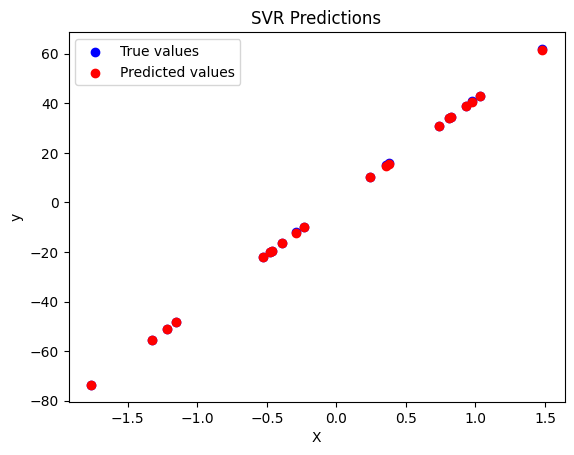

In [17]:
# Step 9: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Step 10: Plot the results
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('SVR Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()